In [1]:
from imports_for_ML import *
import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.preprocessing.image import load_img, img_to_array

from keras.callbacks import EarlyStopping

import os
import seaborn as sns

%matplotlib inline

In [2]:
def check_net_correctness(check_idx, test_sample, true_labels):
    predictions = model.predict(test_sample)
    plt.imshow(test_sample[check_idx] / 255)

    text = 'The network is: {:.2f}% sure it is a dog,\nbut really it is a {}, so the network {}'
    correct_response = true_labels[check_idx]
    it_is_really = ['cat', 'dog'][correct_response]
    net_claims = predictions[check_idx, 0]
    is_net_correct = np.abs(net_claims - correct_response) < 0.5

    plt.title(text.format(net_claims * 100., it_is_really, ['is wrong', 'is right'][is_net_correct]))
    plt.axis('off')

In [3]:
def display_training_curves(history):
    fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(7,10))
    ax[0].plot(history.history['accuracy'], label='accuracy')
    ax[0].plot(history.history['val_accuracy'], label='validation accuracy')
    ax[0].legend()
    ax[0].title.set_text('Training and Validation Accuracy')
    #ax[0].set_xlabel('number of epochs')
    
    ax[1].plot(history.history['val_loss'], label='validation loss')
    ax[1].scatter(y=history.history['loss'],x=range(0,len(history.history['loss'])), label='traingin loss')
    ax[1].title.set_text('Training and Validation loss')
    ax[1].legend()
    ax[1].set_xlabel('number of epochs')

In [ ]:
def load_images(img_dir, n_images=1000, resize=(50, 50)):
    '''
    Load images of cats and dogs and organize into sklearn-like format.
    '''
    try:
        from keras.preprocessing.image import load_img, img_to_array
    except:
        from tensorflow.keras.preprocessing.image import load_img, img_to_array

    images = os.listdir(img_dir)
    is_dog = np.array(['dog' in img for img in images])
    n_per_categ = n_images // 2

    n_stars = 0
    imgs, y = list(), list()
    for flt_idx, flt in enumerate([~is_dog, is_dog]):
        sel_images = np.array(images)[flt]
        np.random.shuffle(sel_images)
        for idx in range(n_per_categ):
            full_img_path = os.path.join(img_dir, sel_images[idx])
            imgs.append(img_to_array(load_img(full_img_path,
                                              target_size=resize)))
            y.append(flt_idx)

            # progressbar
            if idx % 20 == 0:
                print('*', end='')
                n_stars += 1
            if n_stars == 50:
                n_stars = 0
                print('')

    y = np.array(y)
    imgs = np.stack(imgs, axis=0)
    return imgs, y

In [4]:
img_dir = r'train'
images = os.listdir(img_dir)
images[:3]

['dog.8011.jpg', 'cat.5077.jpg', 'dog.7322.jpg']

In [5]:
full_images = [os.path.join(img_dir, img) for img in images]

In [6]:
full_images[:3]

['train/dog.8011.jpg', 'train/cat.5077.jpg', 'train/dog.7322.jpg']

In [7]:
from imports_for_ML import load_images

X, y = load_images(img_dir, n_images=10000, resize=(64, 64))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************


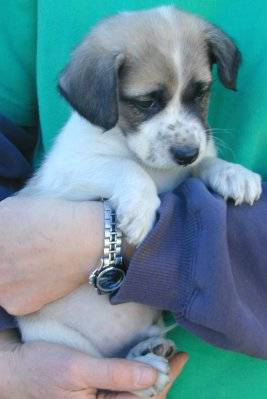

In [8]:
load_img(full_images[66])

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

In [11]:
X_test[1].shape

(64, 64, 3)

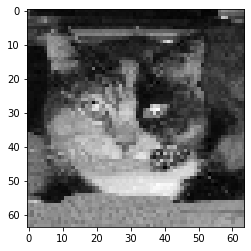

In [12]:
plt.imshow(X[66].mean(axis=2), cmap='gray')

In [32]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3)))

model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.4))

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.4))

model.add(Flatten(input_shape=(5,5,32)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
early_stop = EarlyStopping(patience=4, verbose=1, min_delta=0.0001,restore_best_weights=True)

In [35]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.04, callbacks=[early_stop])

Epoch 1/20
270/270 [==============================] - 29s 102ms/step - loss: 0.9400 - accuracy: 0.5125 - val_loss: 0.6875 - val_accuracy: 0.5389
Epoch 2/20
270/270 [==============================] - 28s 105ms/step - loss: 0.7679 - accuracy: 0.5353 - val_loss: 0.6450 - val_accuracy: 0.6417
Epoch 3/20
270/270 [==============================] - 31s 117ms/step - loss: 0.7054 - accuracy: 0.5641 - val_loss: 0.6419 - val_accuracy: 0.6444
Epoch 4/20
270/270 [==============================] - 81s 299ms/step - loss: 0.6438 - accuracy: 0.6360 - val_loss: 0.5851 - val_accuracy: 0.7389
Epoch 5/20
270/270 [==============================] - 37s 136ms/step - loss: 0.6220 - accuracy: 0.6626 - val_loss: 0.5861 - val_accuracy: 0.6722
Epoch 6/20
270/270 [==============================] - 34s 125ms/step - loss: 0.5850 - accuracy: 0.7031 - val_loss: 0.5722 - val_accuracy: 0.6889
Epoch 7/20
270/270 [==============================] - 33s 122ms/step - loss: 0.5655 - accuracy: 0.7144 - val_loss: 0.5293 - val_ac

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
batch_normalization_20 (Batc (None, 62, 62, 16)        64        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 60, 60, 16)        2320      
_________________________________________________________________
batch_normalization_21 (Batc (None, 60, 60, 16)        64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 20, 20, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 20, 20, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 18, 18, 32)       

In [37]:
print('Accuracy on the training data:')
print(model.evaluate(X_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(X_test, y_test)[1])

Accuracy on the training data:
282/282 [==============================] - 6s 20ms/step - loss: 0.3085 - accuracy: 0.8696
0.8695555329322815

Accuracy on the test data:
32/32 [==============================] - 1s 22ms/step - loss: 0.3687 - accuracy: 0.8280
0.828000009059906


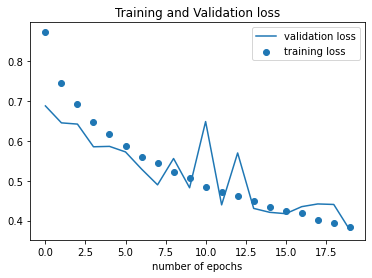

In [38]:
plt.plot(history.history['val_loss'], label='validation loss')
plt.scatter(y=history.history['loss'],x=range(0,len(history.history['loss'])), label='training loss')
plt.title('Training and Validation loss')
plt.xlabel('number of epochs')
plt.legend()

Text(0.5, 0, 'number of epochs')

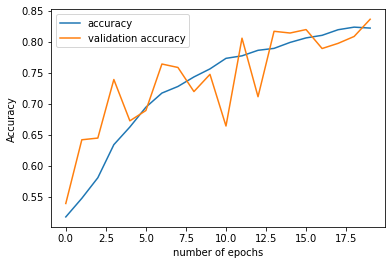

In [39]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('number of epochs')

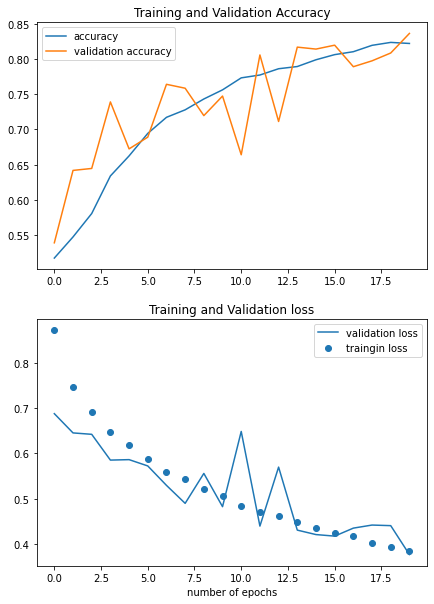

In [40]:
display_training_curves(history)

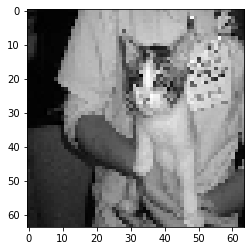

In [41]:
plt.imshow(X_test[666].mean(axis=2), cmap='gray')

<ipython-input-2-70072b66af22>:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  plt.title(text.format(net_claims * 100., it_is_really, ['is wrong', 'is right'][is_net_correct]))


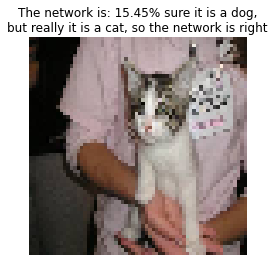

In [42]:
check_net_correctness(666, X_test, y_test)

In [43]:
model_predictions = model.predict_classes(X_test)

model_predictions = model_predictions.reshape(1000)

In [44]:
wrong_preds = np.array(np.where(~(model_predictions==y_test)))[0]

In [45]:
corr_preds = np.array(np.where((model_predictions==y_test)))[0]

In [46]:
import random

In [47]:
preds = model.predict(X_test)

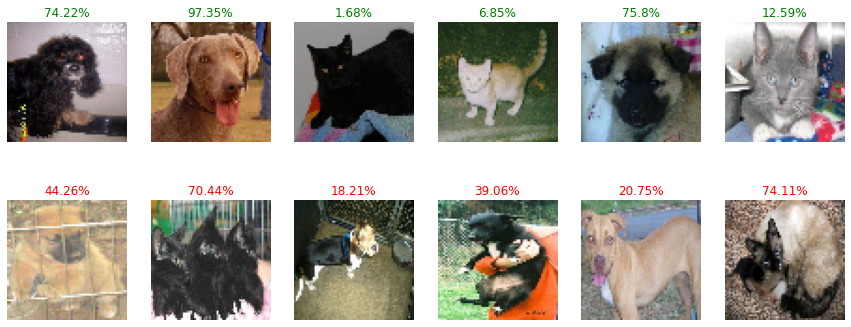

In [29]:
random_wrong = random.sample(list(wrong_preds), 6)
random_corr = random.sample(list(corr_preds), 6)

columns = 6
rows = 2

fig, ax = plt.subplots(ncols=columns, nrows=rows, figsize=(15,6))


for col, pic in zip(range(0,columns),random_corr):
    ax[0,col].imshow(X_test[pic] / 255)
    ax[0,col].title.set_text(f"{round(preds[pic,0]*100.,ndigits=2)}%")
    ax[0,col].title.set_color('green')
    ax[0,col].axis('off')
    
for col, pic in zip(range(0,columns),random_wrong):
    ax[1,col].imshow(X_test[pic] / 255)
    ax[1,col].title.set_text(f"{round(preds[pic,0]*100.,ndigits=2)}%")
    ax[1,col].title.set_color('red')
    ax[1,col].axis('off')

In [196]:
def predict_single_object(pth, model):
    item = img_to_array(load_img(pth, target_size=(64,64)))
    to_predict = np.expand_dims(item, axis=0)
    prediction = model.predict(to_predict)
    
    dog_or_cat = lambda x: "dog" if x > 0.5 else "cat"
    is_real = dog_or_cat(prediction[0][0])
    
    if is_real == "dog":
        real_pred = prediction[0][0]
    else:
        real_pred = 1-prediction[0][0]
    
    text = 'The network is: {}% sure it is a {}'
    plt.imshow(item / 255)
    plt.title(text.format(round(real_pred*100.,ndigits=2), is_real))
    plt.axis('off')
    

In [211]:
def predict_three_objects(list_of_paths, model):
    """
    Predicts and displays three random photos from the folder of path (given as an argument) with the use of Model (defined as 2nd argument)
    """
    
    list_of_paths = random.sample(list_of_paths, 3)
    
    rows=len(full_images)/3
    columns=3
    
    fig, ax = plt.subplots(ncols=columns, nrows=int(rows), figsize=(15,5))
    for col, item in zip(range(0,columns),list_of_paths):
        raw = img_to_array(load_img(item, target_size=(64,64)))
        to_predict = np.expand_dims(raw, axis=0)
        prediction = model.predict(to_predict)
        
        dog_or_cat = lambda x: "dog" if x > 0.5 else "cat"
        is_real = dog_or_cat(prediction[0][0])
        
        if is_real == "dog":
            real_pred = prediction[0][0]
        else:
            real_pred = 1-prediction[0][0]
            
        text = 'The network is: {}% sure it is a {}'
        
        ax[col].imshow(raw / 255)
        ax[col].title.set_text(text.format(round(real_pred*100.,ndigits=2), is_real))
        ax[col].axis('off')

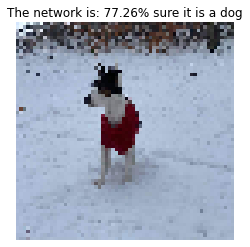

In [198]:
path = r'test_dogs/babel.jpg'
predict_single_object(path,model)

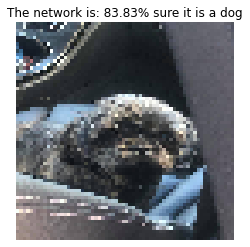

In [199]:
path = r'test_dogs/pikus.jpg'
predict_single_object(path,model)

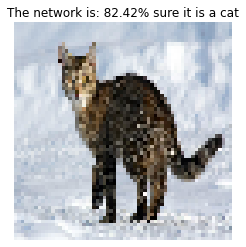

In [200]:
path = r'test_dogs/cat.jpg'
predict_single_object(path,model)

In [201]:
img_test = r'test_dogs'
images_test = os.listdir(img_dir)
images_test = images_test[1:]
images_test

['dog-puppy-on-garden-royalty-free-image-1586966191.jpg',
 'cat.jpg',
 'pikus.jpg',
 'babel.jpg']

In [202]:
full_images_test = [os.path.join(img_dir, img) for img in images_test]
full_images_test

['test_dogs/dog-puppy-on-garden-royalty-free-image-1586966191.jpg',
 'test_dogs/cat.jpg',
 'test_dogs/pikus.jpg',
 'test_dogs/babel.jpg']

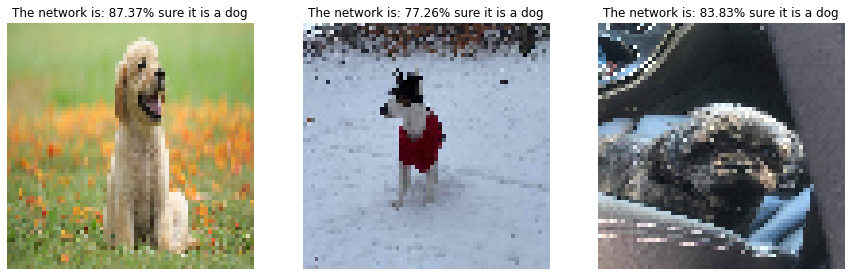

In [210]:
predict_three_objects(full_images_test,model)